Feature Selection Algorithm.
Select the Algoriths to run by entering the option 1 or 2
1. Forward Feature Selection
2. Backward Features Elimination
2
Total number of features : 10
Total data records : 300
Running backward feature elimination algorithm
Running nearest neighbor with all  10  features, gave  accuracy of  0.7333333333333333
	feature(s)  [2, 3, 4, 5, 6, 7, 8, 9, 10]  accuracy is  0.7533333333333333
	feature(s)  [1, 3, 4, 5, 6, 7, 8, 9, 10]  accuracy is  0.8066666666666666
	feature(s)  [1, 2, 4, 5, 6, 7, 8, 9, 10]  accuracy is  0.7966666666666666
	feature(s)  [1, 2, 3, 5, 6, 7, 8, 9, 10]  accuracy is  0.7766666666666666
	feature(s)  [1, 2, 3, 4, 6, 7, 8, 9, 10]  accuracy is  0.7566666666666667
	feature(s)  [1, 2, 3, 4, 5, 7, 8, 9, 10]  accuracy is  0.7566666666666667
	feature(s)  [1, 2, 3, 4, 5, 6, 8, 9, 10]  accuracy is  0.7433333333333333
	feature(s)  [1, 2, 3, 4, 5, 6, 7, 9, 10]  accuracy is  0.75
	feature(s)  [1, 2, 3, 4, 5, 6, 7, 8, 10]  accuracy is  0.78
	feature(s)  

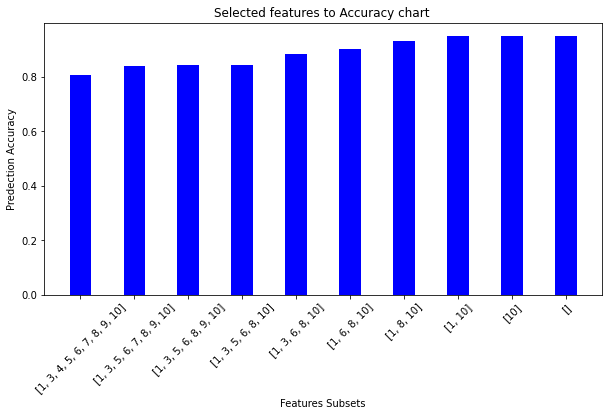

In [9]:
'''vamsi AI CS 205 PROJECT2'''
import math
import copy
import sys
import time
import numpy as np
import matplotlib.pyplot as plt
 

class Classifier:
    def __init__(self):
        pass
    
    #nearest neighbor algorithm
    def nearestNeighbor(self,data, feature_subset, totalRecords,point):
        nearestNeighbor = 0
        shortest_distance = float(sys.maxsize)
        for i in range(totalRecords):
            # If the instance == the point, ignore/do nothing
            if point == i:
                pass
            else:
                dist = 0
                #calculate euclidian distance
                for feature in feature_subset:
                    dist = dist + pow((data[i][feature] - data[point][feature]), 2)
                dist = math.sqrt(dist)
                if dist < shortest_distance:
                    nearestNeighbor = i 
                    shortest_distance = dist
        return data[nearestNeighbor][0]

    #leave one out validation
    def leaveOneOutValidator(self,data, feature_subset, totalRecords):
        predictedCorrect = 0
        #running nearest neighbor algoritm, for all data points as test data except current poinr
        for currentRecordOut in range(totalRecords):
            currentClassLable=data[currentRecordOut][0]
            neighborClass = self.nearestNeighbor(data, feature_subset, totalRecords,currentRecordOut)
            if neighborClass == currentClassLable:
                predictedCorrect = predictedCorrect + 1
        accuracy = predictedCorrect / totalRecords
        return accuracy

class SelectionAlgorithms:
    def __init__(self):
        pass
    
    #forward selection algorithm
    def forwardFeatureSelection(self,data, totalRecords, totalNumFeatures):
            classifier=Classifier()
            start=time.time()
            finalResults,featureSubset,finalSetOfFeatures,bestAccuracy={},[],[],0
            #iterating for each level to increase features
            for level in range(totalNumFeatures):
                bestFeatureSelected,weakFeatureSelected,reducedFeatureAccuracy = 0,0,0
                for feature in range(1, totalNumFeatures + 1):
                    #only add the feature if it is not already added
                    if feature not in featureSubset:
                        temp = copy.deepcopy(featureSubset)
                        temp.append(feature)
                        accuracy = classifier.leaveOneOutValidator(data, temp, totalRecords)
                        print('\t Feature subset ', temp, ' accuracy is ', accuracy)
                        #check for the best accuracy obtained
                        if accuracy > bestAccuracy:
                            bestAccuracy,bestFeatureSelected = accuracy,feature
                        if accuracy > reducedFeatureAccuracy:
                            reducedFeatureAccuracy , weakFeatureSelected= accuracy,feature
                #checking if accuracy imporved and adding the features with good accuracy
                if bestFeatureSelected != 0:
                    featureSubset.append(bestFeatureSelected)
                    finalSetOfFeatures.append(bestFeatureSelected)
                    finalResults[str(featureSubset)]=bestAccuracy
                    print('\n\n at level'+str((int(level)+1))+ ' , Feature set ', featureSubset, ' was best, accuracy is ', bestAccuracy)
                else:
                    print('Accuracy has decreased')
                    featureSubset.append(weakFeatureSelected)
                    finalResults[str(featureSubset)]=bestAccuracy
                    print('Feature set ', featureSubset, ' was best, accuracy is ', reducedFeatureAccuracy, '%\n\n')

            print("Serch completed")
            print('The best feature subset is', finalSetOfFeatures, ' with accuracy of : ', bestAccuracy)
            end =time.time()
            print("time taken :",round(end-start,2), "seconds")
            self.visualizeResults(finalResults)
    
    def visualizeResults(self,finalResults):
        features = list(finalResults.keys())
        accuracy = list(finalResults.values())
        fig = plt.figure(figsize = (10, 5))
        plt.bar(features, accuracy, color ='blue',
            width = 0.4)
        plt.xlabel("Features Subsets")
        plt.ylabel("Predection Accuracy")
        plt.title("Selected features to Accuracy chart ")
        plt.xticks(rotation=45)
        plt.show()    
    
    #backward elimination
    def backwardFeatureElimination(self,data, totalRecords, totalFeatures,all_features):

        finalResults={}
        c=Classifier()
        start=time.time()
        #finding accuracy for with all features included
        accuracy = c.leaveOneOutValidator(data, all_features, totalRecords)
        print('Running nearest neighbor with all ', totalFeatures, ' features, gave  accuracy of ', accuracy)

        # Start with full feature set
        feature_subset = [i+1 for i in range(totalFeatures)]
        final_set = [i+1 for i in range(totalFeatures)]
        # Set current accuracy to accuracy found before feature algorithm
        bestAccuracy = accuracy
        for i in range(totalFeatures):
            removeFeature,accu,lr = 0,0,0
            for feat in range(1, totalFeatures + 1):
                if feat in feature_subset:
                    temp_subset = copy.deepcopy(feature_subset)
                    temp_subset.remove(feat)
                    accuracy = c.leaveOneOutValidator(data, temp_subset, totalRecords)
                    print('\tfeature(s) ', temp_subset, ' accuracy is ', accuracy)
                    #check for the best accuracy obtained so far
                    if accuracy > bestAccuracy:
                        bestAccuracy,removeFeature = accuracy,feat
                    if accuracy > accu:
                        accu,lr = accuracy,feat
             #checking if accuracy imporved and adding the features with good accuracy
            if removeFeature != 0:
                feature_subset.remove(removeFeature)
                final_set.remove(removeFeature)
                finalResults[str(feature_subset)]=bestAccuracy
                print('\n\nFeature set ', feature_subset, ' was best, accuracy is ', bestAccuracy)
            else:
                print('\n\nAccuracy has decreased')
                feature_subset.remove(lr)
                print('Feature set ', feature_subset, ' was best, accuracy is ', accu)
                finalResults[str(feature_subset)]=bestAccuracy
        
        end = time.time()
        print("Search completed")
        print("time taken :",round(end-start,2), "seconds")
        print('The best feature subset is', final_set, ' with accaracy of : ', bestAccuracy)
        self.visualizeResults(finalResults)
    

    

#min max normalization of data

def min_max_normalize(data, num_features, num_instances):
    maxVal=[]
    minVal=[]
    for i in range(1, num_features + 1):
        maxVal.append(max(row[i] for row in data))
        minVal.append(min(row[i] for row in data))
    for i in range(0, num_instances):
        for j in range(1, num_features + 1):
            data[i][j]=((data[i][j]-minVal[j-1])/maxVal[j-1]-minVal[j-1])
    return data



def main():
    
    algos=SelectionAlgorithms()
    print('Feature Selection Algorithm.')
    try:
        data = open('vamsiSmallDataSet15.txt', 'r')
    except:
        raise IOError('The file '+ 'vamsiSmallDataSet.txt' +' does not exist. Exiting program.')

    # Read in first line to see # features 
    line = data.readline()
    totalFeatures = len(line.split()) - 1
    # Read in all lines on file to get # records
    data.seek(0)
    totalRecords = sum(1 for line in data)
    data.seek(0)

    # Store data into variable record
    records = [[] for i in range(totalRecords)]
    for i in range(totalRecords):
        records[i] = [float(j) for j in data.readline().split()]

    
    # Algorithm selection
    print('Select the Algoriths to run by entering the option 1 or 2')
    print('1. Forward Feature Selection')
    print('2. Backward Features Elimination')
    algoSelected = int(input())
    while algoSelected not in [1,2]:
        print('Invalid selection, please try again.')
        algoSelected = int(input())


    print("Total number of features :",totalFeatures)
    print("Total data records :",totalRecords)

    normalized_records = min_max_normalize(records, totalFeatures, totalRecords)

    # Run nearest neighbor + one out validation + ALL features, print results
    all_features = []
    for i in range(1, totalFeatures + 1):
        all_features.append(i)


    if algoSelected == 1:
        print('Running forward feature selection algorithm')
        algos.forwardFeatureSelection(normalized_records, totalRecords, totalFeatures)
    elif algoSelected == 2:
        print('Running backward feature elimination algorithm')
        algos.backwardFeatureElimination(normalized_records, totalRecords, totalFeatures,all_features)
if __name__ == '__main__':
    main()
    